In [1]:
%matplotlib inline

In [64]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import scipy.stats as sts

In [4]:
# Files to load

city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [7]:
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
city_data_df.isnull().count()

city            120
driver_count    120
type            120
dtype: int64

In [12]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
sum(city_data_df["type"]=="Rural")

18

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]


In [22]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [25]:
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]

In [41]:
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]

In [42]:
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [43]:
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]

Text(0.5, 1.0, 'PyBer Ride-Sharing Data(2019')

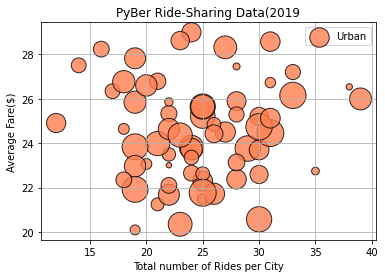

In [44]:
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c="coral",edgecolor="black",linewidths=1,label="Urban",alpha=0.8)
plt.grid()
plt.legend()
plt.xlabel("Total number of Rides per City")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data(2019")

Text(0.5, 1.0, 'PyBer Ride-Sharing Data(2019')

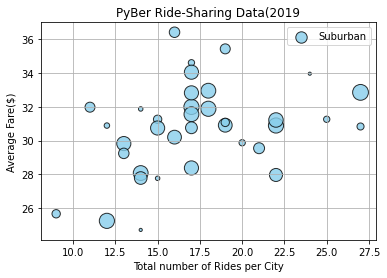

In [45]:
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c="skyblue",edgecolor="black",linewidths=1,label="Suburban",alpha=0.8)
plt.grid()
plt.legend()
plt.xlabel("Total number of Rides per City")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data(2019")

Text(0.5, 1.0, 'PyBer Ride-Sharing Data(2019')

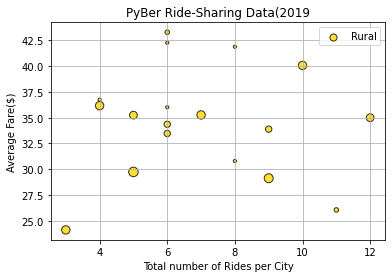

In [46]:
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,c="gold",edgecolor="black",linewidths=1,label="Rural",alpha=0.8)
plt.grid()
plt.legend()
plt.xlabel("Total number of Rides per City")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data(2019")

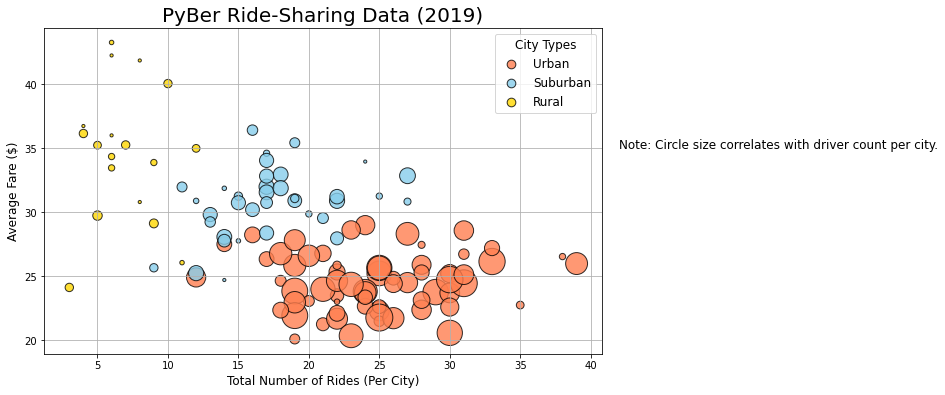

In [57]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c="coral",edgecolor="black",linewidths=1,label="Urban",alpha=0.8)
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c="skyblue",edgecolor="black",linewidths=1,label="Suburban",alpha=0.8)
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,c="gold",edgecolor="black",linewidths=1,label="Rural",alpha=0.8)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save
plt.savefig("analysis/Fig1.png")
# Show the Plot
plt.show()


In [61]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [63]:
suburban_ride_count.mode()

0    17
dtype: int64

In [70]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [79]:
# Get the fares for each type of city in a DataFrame
urban_fares=urban_cities_df["fare"]
suburban_fares=suburban_cities_df["fare"]
rural_fares=rural_cities_df["fare"]

# Calculate mean median and mode for fare for each city type.


mean_urban_fare=np.mean(urban_fares)
print(f"The mean for the ride counts for urban trips is {mean_urban_fare:.2f}.")
median_urban_fare=np.median(urban_fares)
print(f"The median for the ride counts for urban trips is {median_urban_fare}.")
mode_urban_fare=sts.mode(urban_fares)
print(f"The mode for the ride counts for urban trips is {mode_urban_fare}.")

mean_suburban_fare=np.mean(suburban_fares)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_fare:.2f}.")
median_suburban_fare=np.median(suburban_fares)
print(f"The median for the ride counts for suburban trips is {median_suburban_fare}.")
mode_suburban_fare=sts.mode(suburban_fares)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_fare}.")

mean_rural_fare=np.mean(rural_fares)
print(f"The mean for the ride counts for rural trips is {mean_rural_fare:.2f}.")
median_rural_fare=np.median(rural_fares)
print(f"The median for the ride counts for rural trips is {median_rural_fare}.")
mode_rural_fare=sts.mode(rural_fares)
print(f"The mode for the ride counts for rural trips is {mode_rural_fare}.")



The mean for the ride counts for urban trips is 24.53.
The median for the ride counts for urban trips is 24.64.
The mode for the ride counts for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean for the ride counts for suburban trips is 30.97.
The median for the ride counts for suburban trips is 30.75.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean for the ride counts for rural trips is 34.62.
The median for the ride counts for rural trips is 37.05.
The mode for the ride counts for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [82]:
# Get the driver count for each type of city in a DataFrame
urban_drivers=urban_cities_df["driver_count"]
suburban_drivers=suburban_cities_df["driver_count"]
rural_drivers=rural_cities_df["driver_count"]

# Calcullate mean median and mode for driver count for each city type.


mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean for the driver counts for urban trips is {mean_urban_drivers:.2f}.")
median_urban_drivers=np.median(urban_drivers)
print(f"The median for the driver counts for urban trips is {median_urban_drivers}.")
mode_urban_drivers=sts.mode(urban_fares)
print(f"The mode for the driver counts for urban trips is {mode_urban_drivers}.")

mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean for the driver counts for suburban trips is {mean_suburban_drivers:.2f}.")
median_suburban_drivers=np.median(suburban_drivers)
print(f"The median for the driver counts for suburban trips is {median_suburban_drivers}.")
mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode for the driver counts for suburban trips is {mode_suburban_drivers}.")

mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean for the driver counts for rural trips is {mean_rural_drivers:.2f}.")
median_rural_drivers=np.median(rural_drivers)
print(f"The median for the ride counts for rural trips is {median_rural_drivers}.")
mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode for the driver counts for rural trips is {mode_rural_drivers}.")

The mean for the driver counts for urban trips is 36.68.
The median for the driver counts for urban trips is 37.0.
The mode for the driver counts for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean for the driver counts for suburban trips is 13.71.
The median for the driver counts for suburban trips is 16.0.
The mode for the driver counts for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean for the driver counts for rural trips is 4.30.
The median for the ride counts for rural trips is 4.0.
The mode for the driver counts for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


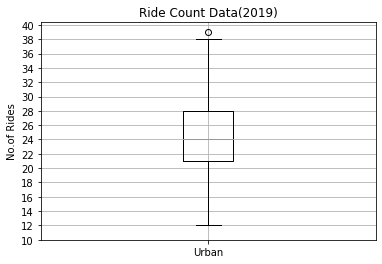

In [97]:
# Box and Whisker Plot for Ride Count in Urabn City type
x_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_ride_count,labels=x_labels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("No.of Rides")
ax.set_yticks(np.arange(10,41,2))
ax.grid(True)


In [98]:
# Append Values to x_labels

x_labels.append("Suburban")
x_labels.append("Rural")


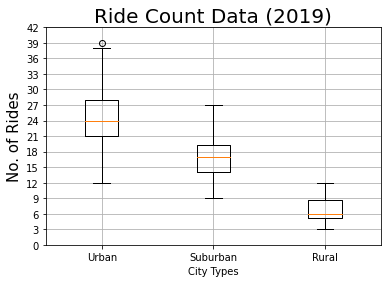

In [106]:
# Box and Whisker for ride count for all 3 city types

ride_count_data=[urban_ride_count,suburban_ride_count,rural_ride_count]
fig,ax=plt.subplots()
ax.set_title("Ride Count Data (2019)",fontsize=20)
ax.set_ylabel("No. of Rides",fontsize=15)
ax.set_xlabel("City Types")
ax.boxplot(ride_count_data,labels=x_labels)
ax.set_yticks(np.arange(0,45,3))
ax.grid()
plt.savefig("analysis/Fig2.jpeg")
plt.show()

In [108]:
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


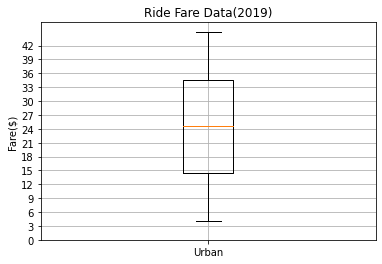

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [125]:
# Create Box and Whisker plot for Fare in Urabn Cities

m_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_fares,labels=m_labels)
ax.set_title("Ride Fare Data(2019)")
ax.set_ylabel("Fare($)")
ax.set_yticks(np.arange(0,45,3))
ax.grid(True)
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [127]:
m_labels
m_labels.append("Rural")

m_labels


['Urban', 'Suburban', 'Rural']

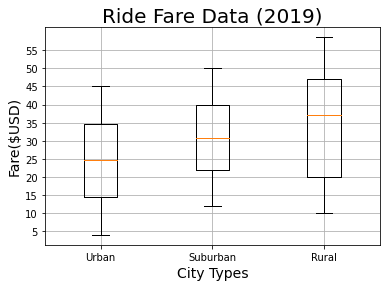

In [138]:
# Box and Whisker Plot for Fares in all 3 cities

fare_type=[urban_fares,suburban_fares,rural_fares]
fig,ax=plt.subplots()
ax.set_title("Ride Fare Data (2019)",fontsize=20)
ax.set_ylabel("Fare($USD)",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0,56,5))
ax.boxplot(fare_type,labels=m_labels)
ax.grid()
plt.savefig("analysis/ride_fare_data.jpeg")


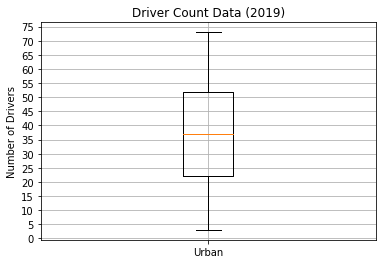

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [133]:
n_labels=["Urban"]
fig,ax=plt.subplots()
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,5))
ax.boxplot(urban_drivers,labels=n_labels)
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [134]:
n_labels.append("Suburban")
n_labels.append("Rural")
n_labels

['Urban', 'Suburban', 'Rural']

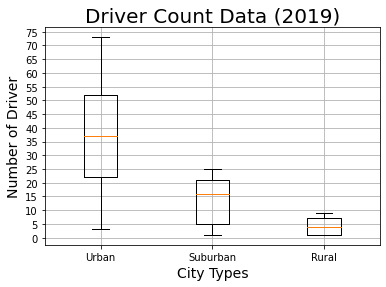

In [139]:
driver_count_type=[urban_drivers,suburban_drivers,rural_drivers]
fig,ax=plt.subplots()
ax.set_title("Driver Count Data (2019)",fontsize=20)
ax.set_xlabel("City Types",fontsize=14)
ax.set_ylabel("Number of Driver",fontsize=14)
ax.set_yticks(np.arange(0,90,5))
ax.boxplot(driver_count_type,labels=n_labels)
ax.grid()
plt.savefig("analysis/Driver_Count_Data.jpeg")
plt.show()

In [142]:
# Sum of fare by type
sum_fare_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [143]:
# total fares.
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [144]:
# Pecentage for each type

type_percent=100*sum_fare_by_type/total_fares
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

([<matplotlib.patches.Wedge at 0x2a705198670>,
 [Text(1.0749106638891923, 0.23359594315247792, 'Rural'),
  Text(0.20317017984928465, 1.0810744091042066, 'Suburban'),
  Text(-0.4281129149941136, -1.013271598346289, 'Urban')])

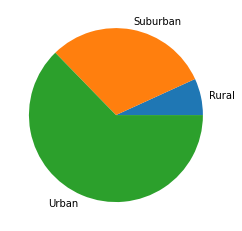

In [146]:
plt.pie(type_percent,labels=["Rural","Suburban","Urban"])

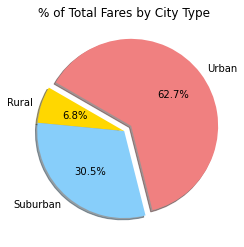

In [148]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

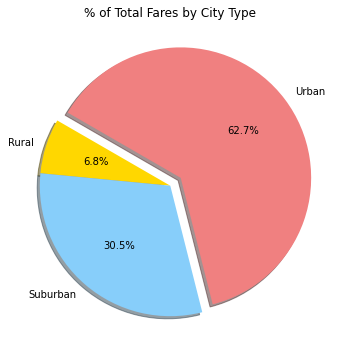

In [151]:
 # Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [153]:
ride_percent=100*pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df.count()["ride_id"]
ride_percent

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

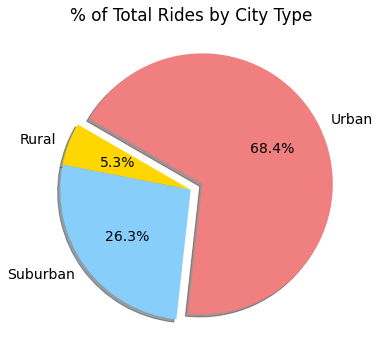

In [155]:
 # Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Ride_percent.jpeg")
# Show Figure
plt.show()

In [158]:
driver_percent=100*city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df.sum()["driver_count"]
driver_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

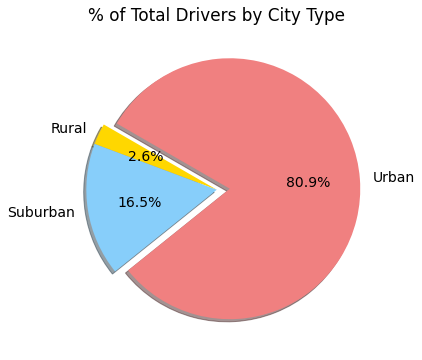

In [159]:
 # Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/driver_percent.jpeg")
# Show Figure
plt.show()